In [12]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from requests.auth import HTTPBasicAuth
import geopandas as gpd
import data_processing.api
import data_processing.jbv_api as jbv_api
import data_processing.jbv_process as jbv_process
import geopandas as gpd
import csv

In [13]:
# Define the API endpoint
url = "https://api.jordbruksverket.se/rest/povapi/skadegorare/alla"

# Define the username and password for authentication
username = "aiqu9neigheigaebeeP8nohh4kiengei"
password = "Jordbruksverket"

# Make the API call with Basic Authentication
response = requests.get(url, auth=HTTPBasicAuth(username, password))

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Convert the JSON data into a DataFrame
    df = pd.DataFrame(data)
    
    # Display the DataFrame
    print(df)
else:
    print(f"Error: {response.status_code} - {response.text}")


                        0
0       Adelphocoris spp.
1    Adoxophyes orana    
2              Alternaria
3           Apolygus spp.
4               Apotecier
..                    ...
194       Övriga Bladlöss
195     Övriga Jordloppor
196         Övriga larver
197      Övriga Stinkflyn
198         Övriga vivlar

[199 rows x 1 columns]


In [14]:
from pyproj import Proj, transform

sweref99_tm = Proj('EPSG:3006')  # SWEREF 99 TM
wgs84 = Proj('EPSG:4326')  # WGS84

Northing = 483000  
Easting = 6209000  
longitude, latitude = transform(sweref99_tm, wgs84, Easting, Northing)

print(f"Decimal degrees (DD): {latitude:.5f}, {longitude:.5f}")


Decimal degrees (DD): 14.72724, 56.02594


C:\Users\Mahmu\AppData\Local\Temp\ipykernel_20140\3585612193.py:8: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  longitude, latitude = transform(sweref99_tm, wgs84, Easting, Northing)


In [15]:
from pyproj import Transformer

sweref99_tm = 'EPSG:3006'
wgs84 = 'EPSG:4326'
transformer = Transformer.from_crs(sweref99_tm, wgs84, always_xy=False)

Northing = 6209000  
Easting = 483000 
latitude, longitude = transformer.transform(Northing, Easting)

print(f"Decimal degrees (DD): {latitude:.5f}, {longitude:.5f}")


Decimal degrees (DD): 56.02594, 14.72724


In [16]:
import api 
api.get_gradings()

ModuleNotFoundError: No module named 'api'

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os

parent_dir = os.path.relpath("../")

sys.path.append(parent_dir)

import api
import csv

import geopandas as gpd


aiqu9neigheigaebeeP8nohh4kiengei Jordbruksverket


In [ ]:
SMHI_URI = {
    "all_parameters": "https://opendata-download-metobs.smhi.se/api/version/latest/parameter.json",
    "all_stations": "https://opendata-download-metobs.smhi.se/api/version/latest/parameter",
}

In [ ]:
from_date = '2020-01-01'
to_date = '2021-01-01'
param_id = "19"

In [ ]:
gradings_df = api.get_gradings(from_date=str(from_date), to_date=str(to_date), crop="Höstvete", pest="svartpricksjuka")


In [ ]:
jbv_gdf = gpd.GeoDataFrame(gradings_df, geometry=gpd.points_from_xy(gradings_df.longitud, gradings_df.latitud), crs="EPSG:3006")
jbv_gdf["geometry"] = jbv_gdf["geometry"].to_crs("EPSG:4326")
jbv_gdf

,delomrade,ekologisk,forforfrukt,forfrukt,graderingstillfalleList,groda,jordart,lan,latitud,longitud,plojt,sadatum,skordear,sort,broddbehandling,utplaceringsdatumFalla,geometry
0,Gotland,False,Vårvete,Höstraps,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Leriga jordar (5-15 % ler),Gotlands län,6353000,704000,True,2018-09-22,2019,Julius,NaN,NaN,POINT (18.3839 57.27438)
1,Uppsala,False,Höstvete,Vårkorn,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Mellanlera (25-40 % ler),Uppsala län,6648000,646000,False,2019-09-05,2020,Norin,False,2020-04-06,POINT (17.61353 59.94348)
2,Uppsala,False,Vårvete,Vårkorn,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Styv lera (>40 % ler),Uppsala län,6626000,611000,False,2019-09-22,2020,Julius,False,2020-04-13,POINT (16.97576 59.75697)
3,Västmanland,False,Vårkorn,Vårkorn,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Styv lera (>40 % ler),Västmanlands län,6609000,594000,False,2019-09-24,2020,Julius,False,2020-04-20,POINT (16.66574 59.60858)
4,Västra Östergötland,False,NaN,NaN,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,NaN,Östergötlands län,NaN,NaN,NaN,NaN,2020,Informer,NaN,2020-09-10,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,Östra Östergötland,False,Höstvete,Höstraps,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Styv lera (>40 % ler),Östergötlands län,6485000,585000,False,2019-09-11,2020,Linus,False,NaN,POINT (16.45836 58.49729)
282,Östra Östergötland,False,Höstkorn,Höstraps,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Styv lera (>40 % ler),Östergötlands län,6487988.000,585403.000,False,2019-09-10,2020,Linus,NaN,NaN,POINT (16.46639 58.52404)
283,Östra Östergötland,False,Höstvete,Träda,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Mellanlera (25-40 % ler),Östergötlands län,6492682.000,587114.000,False,2019-09-13,2020,Informer,False,NaN,POINT (16.49755 58.56585)
284,Östra Östergötland,False,Vårraps,Höstvete,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Mellanlera (25-40 % ler),Östergötlands län,6493926.000,578458.000,True,2019-09-22,2020,Mariboss,NaN,NaN,POINT (16.34923 58.57866)


In [ ]:
countries = ".\\geodata\\ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shp"
world = gpd.read_file(countries)
world

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."


In [ ]:
sweden_boundary = world[world['NAME'] == 'Sweden']
sweden_boundary.to_crs("EPSG:4326")

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
110,Admin-0 country,1,3,Sweden,SWE,0,2,Sovereign country,1,Sweden,...,None,None,None,None,None,None,None,None,None,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."


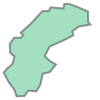

In [ ]:
sweden_boundary.geometry.union_all()

In [ ]:
print(jbv_gdf.shape)

(286, 17)


In [ ]:
jbv_gdf.geometry.within(sweden_boundary.geometry.union_all())

0      False
1       True
2       True
3       True
4      False
       ...  
281     True
282     True
283     True
284     True
285    False
Length: 286, dtype: bool

In [ ]:
print(jbv_gdf.shape)
print(jbv_gdf.shape)
print(jbv_gdf[jbv_gdf.geometry.within(sweden_boundary.geometry.union_all())].shape)
print(jbv_gdf[~jbv_gdf.geometry.within(sweden_boundary.geometry.union_all())].shape)

(286, 17)
(227, 17)
(59, 17)


In [ ]:
jbv_gdf[~jbv_gdf.geometry.within(sweden_boundary.geometry.union_all())]

,delomrade,ekologisk,forforfrukt,forfrukt,graderingstillfalleList,groda,jordart,lan,latitud,longitud,plojt,sadatum,skordear,sort,broddbehandling,utplaceringsdatumFalla,geometry
0,Gotland,False,Vårvete,Höstraps,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Leriga jordar (5-15 % ler),Gotlands län,6353000,704000,True,2018-09-22,2019,Julius,NaN,NaN,POINT (18.3839 57.27438)
4,Västra Östergötland,False,NaN,NaN,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,NaN,Östergötlands län,NaN,NaN,NaN,NaN,2020,Informer,NaN,2020-09-10,POINT EMPTY
5,Blekinge,False,Höstraps,Höstvete,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6214000,477000,True,2019-09-27,2020,Informer,NaN,NaN,POINT (14.63055 56.07061)
6,Blekinge,False,Potatis,Höstvete,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,478000,True,2019-09-20,2020,Mariboss,NaN,NaN,POINT (14.64628 56.1066)
15,Gotland,False,NaN,NaN,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,NaN,Gotlands län,6351000,696000,NaN,NaN,2020,NaN,NaN,NaN,POINT (18.24986 57.25995)
16,Gotland,False,NaN,NaN,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,NaN,Gotlands län,6353000,704000,NaN,NaN,2020,NaN,NaN,NaN,POINT (18.3839 57.27438)
17,Gotland,False,NaN,NaN,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,NaN,Gotlands län,6353000,709000,NaN,NaN,2020,NaN,NaN,NaN,POINT (18.46666 57.27213)
18,Gotland,False,Majs,Åkerböna,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Leriga jordar (5-15 % ler),Gotlands län,6387000,702000,True,2019-09-26,2020,Julius,NaN,NaN,POINT (18.37879 57.58016)
19,Gotland,False,Vårkorn,Potatis,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Leriga jordar (5-15 % ler),Gotlands län,6388000,702000,True,2019-09-27,2020,Julius,NaN,NaN,POINT (18.37962 57.58913)
34,Kalmar,False,Höstvete,Höstvete,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,NaN,Kalmar län,6266000,572000,True,2019-09-19,2020,Hereford,NaN,NaN,POINT (16.17063 56.53285)


In [ ]:
filtered_gdf = jbv_gdf[jbv_gdf['latitud'].notna() & jbv_gdf['longitud'].notna()]
print(filtered_gdf.shape)

(277, 17)


In [ ]:
crop='höstvete'
pest = 'Svartpricksjuka'
data_df = jbv_api.get_gradings(from_date="2015-08-04", to_date="2025-02-01", crop=crop, pest=pest)

In [ ]:
data_df = jbv_process.drop_rows_no_coords(data_df)
data_df.head()

,delomrade,ekologisk,forforfrukt,forfrukt,graderingstillfalleList,groda,jordart,lan,latitud,longitud,plojt,sadatum,skordear,sort,broddbehandling,utplaceringsdatumFalla
0,Blekinge,False,Havre,Höstvete,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
1,Blekinge,False,Potatis,Övrigt,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Mellanlera (25-40 % ler),Blekinge län,6227000,544000,True,2015-10-03,2016,Brons,NaN,NaN
2,Blekinge,False,Höstvete,Höstvete,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6227000,544000,True,2015-09-26,2016,Cubus,NaN,NaN
3,Blekinge,False,Höstkorn,Oljeväxter,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6230000,506000,True,2015-09-12,2016,Brons,NaN,NaN
4,Blekinge,False,Höstkorn,Oljeväxter,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Sandjord (<5 % ler),Blekinge län,6233000,507000,True,2015-09-12,2016,Mariboss,NaN,NaN


In [ ]:
import data_processing.api
import data_processing.jbv_api as jbv_api
import data_processing.jbv_process as jbv_process

aiqu9neigheigaebeeP8nohh4kiengei Jordbruksverket


In [ ]:
crop='höstvete'
pest = 'Svartpricksjuka'
data_df = jbv_api.get_gradings(from_date="2015-08-04", to_date="2025-02-01", crop=crop, pest=pest)
print("---FETCHED JBV-DATA")

---FETCHED JBV-DATA


In [ ]:
data_df.head()

,delomrade,ekologisk,forforfrukt,forfrukt,graderingstillfalleList,groda,jordart,lan,latitud,longitud,plojt,sadatum,skordear,sort,broddbehandling,utplaceringsdatumFalla
0,Blekinge,False,Havre,Höstvete,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
1,Blekinge,False,Potatis,Övrigt,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Mellanlera (25-40 % ler),Blekinge län,6227000,544000,True,2015-10-03,2016,Brons,NaN,NaN
2,Blekinge,False,Höstvete,Höstvete,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6227000,544000,True,2015-09-26,2016,Cubus,NaN,NaN
3,Blekinge,False,Höstkorn,Oljeväxter,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6230000,506000,True,2015-09-12,2016,Brons,NaN,NaN
4,Blekinge,False,Höstkorn,Oljeväxter,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Sandjord (<5 % ler),Blekinge län,6233000,507000,True,2015-09-12,2016,Mariboss,NaN,NaN


In [ ]:
exploded_df = data_df.explode('graderingstillfalleList')


In [ ]:
temp_df = pd.json_normalize(exploded_df['graderingstillfalleList'])
combined_df = pd.concat([exploded_df.reset_index(drop=True)[['groda', 'latitud', 'longitud']], temp_df], axis=1)
combined_df.head()

,groda,latitud,longitud,graderingList,graderingsdatum,graderingstyp,utvecklingsstadium
0,Höstvete,6218000,479000,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-04-18,Veckovis,24
1,Höstvete,6218000,479000,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-04-25,Veckovis,30
2,Höstvete,6218000,479000,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-02,Veckovis,30
3,Höstvete,6218000,479000,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-09,Veckovis,31
4,Höstvete,6218000,479000,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-16,Veckovis,32


In [ ]:
grading_df = pd.json_normalize(combined_df['graderingList'])
grading_df.head()

,0,1
0,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
1,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
2,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
3,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
4,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None


In [ ]:
result_df = pd.concat([combined_df.reset_index(drop=True)[['groda', 'latitud', 'longitud', 'graderingsdatum', 'utvecklingsstadium']], grading_df], axis=1)
result_df.head()

,groda,latitud,longitud,graderingsdatum,utvecklingsstadium,0,1
0,Höstvete,6218000,479000,2016-04-18,24,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
1,Höstvete,6218000,479000,2016-04-25,30,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
2,Höstvete,6218000,479000,2016-05-02,30,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
3,Höstvete,6218000,479000,2016-05-09,31,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
4,Höstvete,6218000,479000,2016-05-16,32,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None


In [ ]:
print(result_df.shape)

(21762, 7)


In [ ]:
result_df['graderingsdatum'] = pd.to_datetime(result_df['graderingsdatum'])
result_df = result_df.sort_values(by='graderingsdatum')
result_df.head()

,groda,latitud,longitud,graderingsdatum,utvecklingsstadium,0,1
1247,Höstvete,6143000,450000,2016-04-11,22,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
1176,Höstvete,6177000,382000,2016-04-18,23,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
1187,Höstvete,6183000,383000,2016-04-18,22,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
1211,Höstvete,6141000,447000,2016-04-18,23,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
151,Höstvete,6274000,374000,2016-04-18,23,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None


In [ ]:
exploded_df = data_df.explode('graderingstillfalleList')
exploded_df.head()

,delomrade,ekologisk,forforfrukt,forfrukt,graderingstillfalleList,groda,jordart,lan,latitud,longitud,plojt,sadatum,skordear,sort,broddbehandling,utplaceringsdatumFalla
0,Blekinge,False,Havre,Höstvete,{'graderingList': [{'matmetod': '% ang blad 1–...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
0,Blekinge,False,Havre,Höstvete,{'graderingList': [{'matmetod': '% ang blad 1–...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
0,Blekinge,False,Havre,Höstvete,{'graderingList': [{'matmetod': '% ang blad 1–...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
0,Blekinge,False,Havre,Höstvete,{'graderingList': [{'matmetod': '% ang blad 1–...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
0,Blekinge,False,Havre,Höstvete,{'graderingList': [{'matmetod': '% ang blad 1–...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN


In [ ]:
normalized_gradering = pd.json_normalize(exploded_df['graderingstillfalleList'])
normalized_gradering

,graderingList,graderingsdatum,graderingstyp,utvecklingsstadium
0,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-04-18,Veckovis,24
1,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-04-25,Veckovis,30
2,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-02,Veckovis,30
3,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-09,Veckovis,31
4,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-16,Veckovis,32
...,...,...,...,...
21757,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2024-05-06,Veckovis,22
21758,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2024-05-13,Veckovis,23
21759,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2024-04-29,Veckovis,23
21760,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2024-05-06,Veckovis,30


In [ ]:
ng2 = normalized_gradering.explode('graderingList')
pd.json_normalize(ng2['graderingList'])

,matmetod,skadegorare,varde
0,% ang blad 1–3,Svartpricksjuka,33.0
1,% ang blad 1–3,Svartpricksjuka,6.0
2,% ang blad 1–3,Svartpricksjuka,4.0
3,% ang blad 1–3,Svartpricksjuka,3.0
4,% ang blad 1–3,Svartpricksjuka,3.0
...,...,...,...
22523,% ang blad 1–3,Svartpricksjuka,14.0
22524,% ang blad 1–3,Svartpricksjuka,0.0
22525,% ang blad 1–3,Svartpricksjuka,34.0
22526,% ang blad 1–3,Svartpricksjuka,18.0


In [ ]:
exploded_df = exploded_df.drop(columns=['graderingstillfalleList'])
ng2 = ng2.drop(columns=['graderingList'])

In [ ]:
exploded_df.head()

,delomrade,ekologisk,forforfrukt,forfrukt,groda,jordart,lan,latitud,longitud,plojt,sadatum,skordear,sort,broddbehandling,utplaceringsdatumFalla
0,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
0,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
0,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
0,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
0,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN


In [ ]:
combined_df = pd.concat([exploded_df.reset_index(drop=True), normalized_gradering.reset_index(drop=True)], axis=1)
combined_df.head()

,delomrade,ekologisk,forforfrukt,forfrukt,groda,jordart,lan,latitud,longitud,plojt,sadatum,skordear,sort,broddbehandling,utplaceringsdatumFalla,graderingList,graderingsdatum,graderingstyp,utvecklingsstadium
0,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-04-18,Veckovis,24
1,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-04-25,Veckovis,30
2,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-02,Veckovis,30
3,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-09,Veckovis,31
4,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-16,Veckovis,32


In [ ]:
import pandas as pd

# Step 1: Explode the 'graderingstillfalleList' column
exploded_df = data_df.explode('graderingstillfalleList')

# Step 2: Normalize the 'graderingstillfalleList' column
normalized_gradering = pd.json_normalize(exploded_df['graderingstillfalleList'])

# Step 3: Explode and normalize the 'graderingList' column (if it exists)
if 'graderingList' in normalized_gradering.columns:
    # Explode the 'graderingList' column
    ng2 = normalized_gradering.explode('graderingList')
    
    # Normalize the 'graderingList' column
    normalized_gradering_list = pd.json_normalize(ng2['graderingList'])
    
    # Drop the original 'graderingList' column to avoid duplication
    ng2 = ng2.drop(columns=['graderingList'], errors='ignore')
else:
    # If 'graderingList' does not exist, create an empty DataFrame
    normalized_gradering_list = pd.DataFrame()

# Step 4: Concatenate all DataFrames into one big table
combined_df = pd.concat([exploded_df.reset_index(drop=True), normalized_gradering.reset_index(drop=True)], axis=1)

if not normalized_gradering_list.empty:
    combined_df = pd.concat([combined_df.reset_index(drop=True), normalized_gradering_list.reset_index(drop=True)], axis=1)

# Display the final DataFrame
combined_df.drop(columns=['graderingstillfalleList', 'graderingList']).head()

,delomrade,ekologisk,forforfrukt,forfrukt,groda,jordart,lan,latitud,longitud,plojt,...,skordear,sort,broddbehandling,utplaceringsdatumFalla,graderingsdatum,graderingstyp,utvecklingsstadium,matmetod,skadegorare,varde
0,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,...,2016.0,Mariboss,NaN,NaN,2016-04-18,Veckovis,24.0,% ang blad 1–3,Svartpricksjuka,33.0
1,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,...,2016.0,Mariboss,NaN,NaN,2016-04-25,Veckovis,30.0,% ang blad 1–3,Svartpricksjuka,6.0
2,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,...,2016.0,Mariboss,NaN,NaN,2016-05-02,Veckovis,30.0,% ang blad 1–3,Svartpricksjuka,4.0
3,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,...,2016.0,Mariboss,NaN,NaN,2016-05-09,Veckovis,31.0,% ang blad 1–3,Svartpricksjuka,3.0
4,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,...,2016.0,Mariboss,NaN,NaN,2016-05-16,Veckovis,32.0,% ang blad 1–3,Svartpricksjuka,3.0


In [ ]:
combined_df[['graderingsdatum']]

In [40]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
crop = df['groda'][0]
pest = df['skadegorare'][0]
df = df.drop(['groda', 'skadegorare'], axis=1)

In [41]:
def assign_growth_zone(geometry_str):
    coords = geometry_str.replace('POINT (', '').replace(')', '').split()
    latitude = float(coords[1]) 
    if latitude < 60.0:
        return 0 #'Southern Sweden'
    elif 60.0 <= latitude <= 64.0:
        return 1 #'Central Sweden'
    else:
        return 2 #'Northern Sweden'
df['GrowthZone'] = df['geometry'].apply(assign_growth_zone)
df.head()

,geometry,varde,utvecklingsstadium,graderingsdatum,Lufttemperatur,Nederbördsmängd,GrowthZone
0,POINT (12.85991951351458 56.13349298683893),79.75,25.25,2015-04-06,8.028571,15.1,0
1,POINT (12.763455607871052 56.131783800733665),100.00,30.00,2015-04-06,8.028571,15.1,0
2,POINT (12.940313957346367 56.13485980252406),30.00,23.00,2015-04-06,8.028571,NaN,0
3,POINT (13.121225022137113 55.724349144006126),90.00,22.00,2015-04-06,8.528571,11.9,0
4,POINT (13.134566983515384 55.77847484676893),98.00,21.00,2015-04-06,8.528571,11.9,0


In [42]:
def replace_nan_with_avg(df, column):
    for i in range(len(df)):
        if pd.isna(df.loc[i, column]): 
            if i == 0: 
                df.loc[i, column] = df.loc[i + 1, column]
            elif i == len(df) - 1: 
                df.loc[i, column] = df.loc[i - 1, column]
            else: 
                prev_val = df.loc[i - 1, column]
                next_val = df.loc[i + 1, column]
                df.loc[i, column] = (prev_val + next_val) / 2

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if df[col].isna().any(): 
        replace_nan_with_avg(df, col)

df

,geometry,varde,utvecklingsstadium,graderingsdatum,Lufttemperatur,Nederbördsmängd,GrowthZone
0,POINT (12.85991951351458 56.13349298683893),79.75,25.25,2015-04-06,8.028571,15.1,0
1,POINT (12.763455607871052 56.131783800733665),100.00,30.00,2015-04-06,8.028571,15.1,0
2,POINT (12.940313957346367 56.13485980252406),30.00,23.00,2015-04-06,8.028571,13.5,0
3,POINT (13.121225022137113 55.724349144006126),90.00,22.00,2015-04-06,8.528571,11.9,0
4,POINT (13.134566983515384 55.77847484676893),98.00,21.00,2015-04-06,8.528571,11.9,0
...,...,...,...,...,...,...,...
17980,POINT (14.069255484114606 56.031714077260816),0.01,39.00,2024-05-13,15.000000,0.0,0
17981,POINT (16.717043428428315 59.571993092117644),46.00,32.00,2024-05-13,16.342857,0.0,0
17982,POINT (18.204105084726773 57.30606609394089),6.00,31.00,2024-05-13,13.057143,0.0,0
17983,POINT (16.45037328387691 56.61974745644302),8.00,32.00,2024-05-13,14.071429,0.0,0


In [43]:
df['graderingsdatum'] = pd.to_datetime(df['graderingsdatum'], errors='coerce')
df['Year'] = df['graderingsdatum'].dt.year
years_to_keep = [2020]
df = df[df['Year'].isin(years_to_keep)]

In [44]:
import seaborn as sns

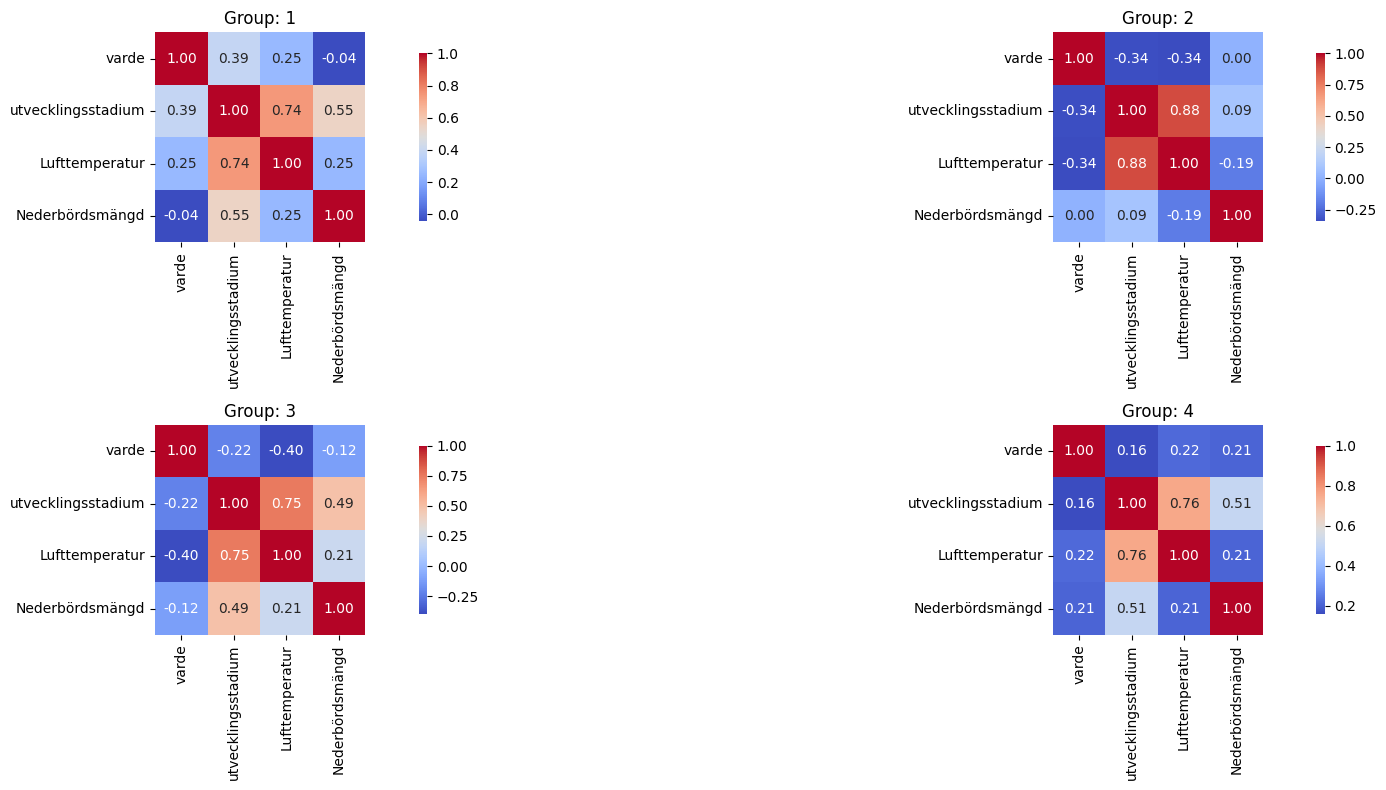

In [45]:
df.loc[:, 'GrowthZone'] = pd.to_numeric(df['GrowthZone'], errors='coerce')
df.loc[:, 'Year'] = pd.to_numeric(df['Year'], errors='coerce')

x_c = 2
y_c = 2
n = x_c * y_c

groups = df.groupby('geometry')
group_sizes = groups.size()
top_groups = group_sizes.nlargest(n).index  

fig, axes = plt.subplots(x_c, y_c, figsize=(20, 8))
axes = axes.flatten() 

for i, name in enumerate(top_groups):
    group_df = df[df['geometry'] == name].drop(columns=['geometry', 'graderingsdatum', 'Year', 'GrowthZone'], errors='ignore')
    
    corr = group_df.corr()
    
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=axes[i], cbar_kws={"shrink": .8})
    axes[i].set_title(f'Group: {i+1}')

plt.tight_layout()
plt.show()

In [160]:
df = pd.read_csv('output.csv')
print(df.shape)

(19269, 9)


In [161]:
df = df.dropna()
print(df.shape)

(19269, 9)


In [162]:
df['graderingsdatum'] = pd.to_datetime(df['graderingsdatum'])
df['Series_id'] = df['Series_id'].astype(int)
df.head()

,ekologisk,groda,skadegorare,graderingsdatum,utvecklingsstadium,varde,Series_id,week,geometry
0,False,Höstvete,Svartpricksjuka,2016-04-18,24.0,33.0,0,16,POINT (14.662356797839683 56.10664183335871)
1,False,Höstvete,Svartpricksjuka,2016-04-25,30.0,6.0,0,17,POINT (14.662356797839683 56.10664183335871)
2,False,Höstvete,Svartpricksjuka,2016-05-02,30.0,4.0,0,18,POINT (14.662356797839683 56.10664183335871)
3,False,Höstvete,Svartpricksjuka,2016-05-09,31.0,3.0,0,19,POINT (14.662356797839683 56.10664183335871)
4,False,Höstvete,Svartpricksjuka,2016-05-16,32.0,3.0,0,20,POINT (14.662356797839683 56.10664183335871)


In [163]:
from shapely.wkt import loads
df['geometry'] = df['geometry'].apply(loads)

In [164]:
df.head()

,ekologisk,groda,skadegorare,graderingsdatum,utvecklingsstadium,varde,Series_id,week,geometry
0,False,Höstvete,Svartpricksjuka,2016-04-18,24.0,33.0,0,16,POINT (14.662356797839683 56.10664183335871)
1,False,Höstvete,Svartpricksjuka,2016-04-25,30.0,6.0,0,17,POINT (14.662356797839683 56.10664183335871)
2,False,Höstvete,Svartpricksjuka,2016-05-02,30.0,4.0,0,18,POINT (14.662356797839683 56.10664183335871)
3,False,Höstvete,Svartpricksjuka,2016-05-09,31.0,3.0,0,19,POINT (14.662356797839683 56.10664183335871)
4,False,Höstvete,Svartpricksjuka,2016-05-16,32.0,3.0,0,20,POINT (14.662356797839683 56.10664183335871)


In [52]:
df['latitude'] = df['geometry'].apply(lambda geom: geom.y)
df['longitude'] = df['geometry'].apply(lambda geom: geom.x)
df.drop('geometry', axis=1)

,ekologisk,groda,skadegorare,graderingsdatum,utvecklingsstadium,varde,Series_id,week,latitude,longitude
0,False,Höstvete,Svartpricksjuka,2016-04-18,24.0,33.0,0,16,56.106642,14.662357
1,False,Höstvete,Svartpricksjuka,2016-04-25,30.0,6.0,0,17,56.106642,14.662357
2,False,Höstvete,Svartpricksjuka,2016-05-02,30.0,4.0,0,18,56.106642,14.662357
3,False,Höstvete,Svartpricksjuka,2016-05-09,31.0,3.0,0,19,56.106642,14.662357
4,False,Höstvete,Svartpricksjuka,2016-05-16,32.0,3.0,0,20,56.106642,14.662357
...,...,...,...,...,...,...,...,...,...,...
19264,False,Höstvete,Svartpricksjuka,2023-05-29,37.0,0.0,1954,22,58.596443,16.428071
19265,False,Höstvete,Svartpricksjuka,2023-06-05,45.0,2.0,1954,23,58.596443,16.428071
19266,False,Höstvete,Svartpricksjuka,2023-06-12,53.0,6.0,1954,24,58.596443,16.428071
19267,False,Höstvete,Svartpricksjuka,2023-06-19,71.0,10.0,1954,25,58.596443,16.428071


In [53]:
import pandas as pd
import requests

def get_openmeteo_weather(row):
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": row['latitude'],
        "longitude": row['longitude'],
        "start_date": row['graderingsdatum'].strftime('%Y-%m-%d'),
        "end_date": row['graderingsdatum'].strftime('%Y-%m-%d'),
        "daily": "temperature_2m_mean,temperature_2m_min,temperature_2m_max,precipitation_sum"
    }
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Raise an error for bad HTTP responses
        data = response.json()
        if 'daily' in data and data['daily']['time']:
            daily = data['daily']
            return pd.Series({
                'avg_temp': daily['temperature_2m_mean'][0],
                'min_temp': daily['temperature_2m_min'][0],
                'max_temp': daily['temperature_2m_max'][0],
                'precipitation': daily['precipitation_sum'][0]
            })
        else:
            print(f"Row {row.name}: No daily data returned for {row['graderingsdatum']}")
    except Exception as e:
        print(f"Row {row.name}: Error fetching weather data - {e}")
    return pd.Series({
        'avg_temp': float('nan'),
        'min_temp': float('nan'),
        'max_temp': float('nan'),
        'precipitation': float('nan')
    })

# Apply to test DataFrame (first 10 rows)
test = df.head(120)
weather_cols = test.apply(get_openmeteo_weather, axis=1)
test = pd.concat([test, weather_cols], axis=1)

# Display the updated DataFrame
test.head()

,ekologisk,groda,skadegorare,graderingsdatum,utvecklingsstadium,varde,Series_id,week,geometry,latitude,longitude,avg_temp,min_temp,max_temp,precipitation
0,False,Höstvete,Svartpricksjuka,2016-04-18,24.0,33.0,0,16,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,7.1,4.2,9.7,0.1
1,False,Höstvete,Svartpricksjuka,2016-04-25,30.0,6.0,0,17,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,3.9,1.1,6.2,1.7
2,False,Höstvete,Svartpricksjuka,2016-05-02,30.0,4.0,0,18,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,8.9,3.5,13.0,0.0
3,False,Höstvete,Svartpricksjuka,2016-05-09,31.0,3.0,0,19,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,14.6,9.6,19.4,0.0
4,False,Höstvete,Svartpricksjuka,2016-05-16,32.0,3.0,0,20,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,8.4,6.9,9.8,4.0


In [54]:
last_series = np.unique(test['Series_id'])[-1]

In [55]:
test = test[test['Series_id'] != last_series]

In [56]:
test.head()

,ekologisk,groda,skadegorare,graderingsdatum,utvecklingsstadium,varde,Series_id,week,geometry,latitude,longitude,avg_temp,min_temp,max_temp,precipitation
0,False,Höstvete,Svartpricksjuka,2016-04-18,24.0,33.0,0,16,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,7.1,4.2,9.7,0.1
1,False,Höstvete,Svartpricksjuka,2016-04-25,30.0,6.0,0,17,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,3.9,1.1,6.2,1.7
2,False,Höstvete,Svartpricksjuka,2016-05-02,30.0,4.0,0,18,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,8.9,3.5,13.0,0.0
3,False,Höstvete,Svartpricksjuka,2016-05-09,31.0,3.0,0,19,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,14.6,9.6,19.4,0.0
4,False,Höstvete,Svartpricksjuka,2016-05-16,32.0,3.0,0,20,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,8.4,6.9,9.8,4.0


In [57]:
test = test.drop(['graderingsdatum', 'geometry', 'ekologisk', 'groda', 'skadegorare', 'latitude', 'longitude'], axis=1)

In [58]:
savior = test.copy()
savior.head()

,utvecklingsstadium,varde,Series_id,week,avg_temp,min_temp,max_temp,precipitation
0,24.0,33.0,0,16,7.1,4.2,9.7,0.1
1,30.0,6.0,0,17,3.9,1.1,6.2,1.7
2,30.0,4.0,0,18,8.9,3.5,13.0,0.0
3,31.0,3.0,0,19,14.6,9.6,19.4,0.0
4,32.0,3.0,0,20,8.4,6.9,9.8,4.0


In [59]:
df_melted = test.melt(value_vars=['utvecklingsstadium', 'varde', 'avg_temp', 'min_temp', 'max_temp', 'precipitation'],
                    var_name='Feature', value_name='Value')

print(test.shape)
print(df_melted.shape)

(114, 8)
(684, 2)


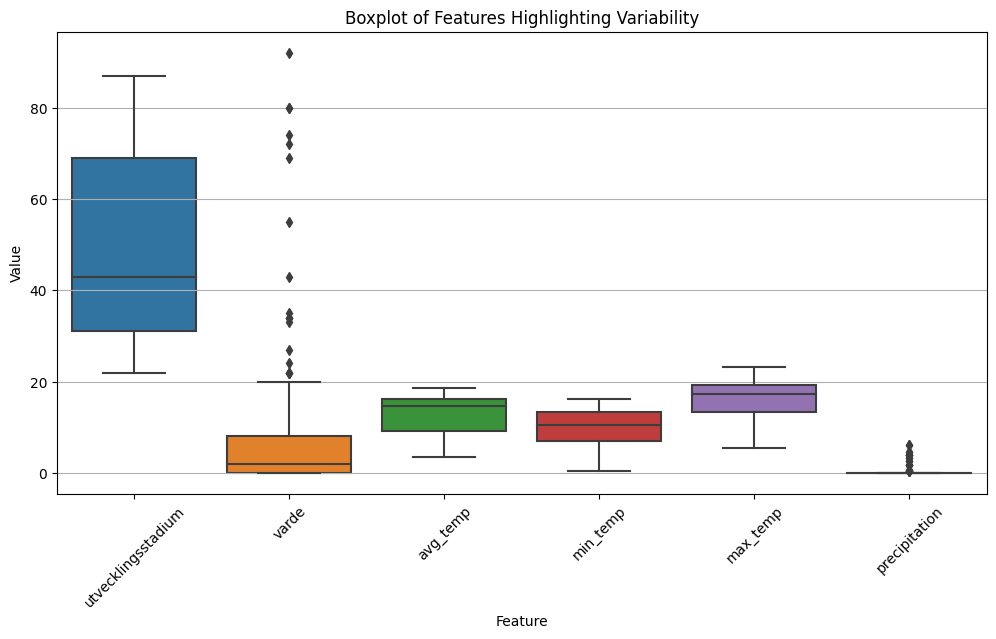

In [60]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Feature', y='Value', data=df_melted)
plt.title('Boxplot of Features Highlighting Variability')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

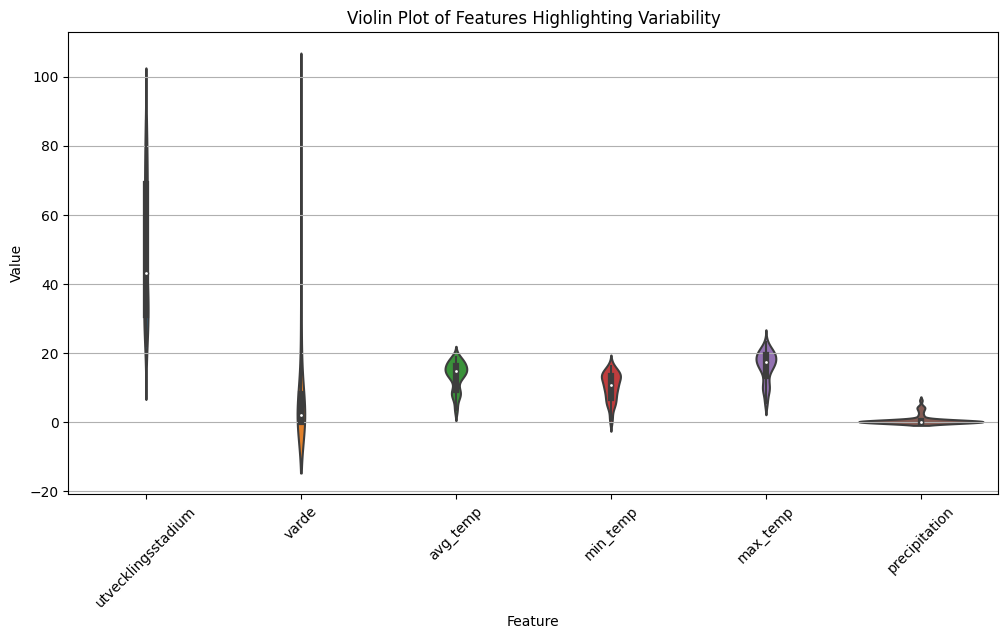

In [61]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Feature', y='Value', data=df_melted)
plt.title('Violin Plot of Features Highlighting Variability')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [62]:
import pandas as pd
import plotly.express as px
import numpy as np

# Ensure Series_id is treated as a string
df['Series_id'] = df['Series_id'].astype(str)

# Select 20 random unique Series IDs
random_series_ids = np.random.choice(df['Series_id'].unique(), size=20, replace=False)

# Filter the dataframe to only include selected Series IDs
df_subset = df[df['Series_id'].isin(random_series_ids)]

# Create scatter plot with bubbles
fig = px.scatter(
    df_subset, 
    x="Series_id",  
    y="varde",    
    size="varde",   
    color="varde",
    color_continuous_scale="Viridis",
    title="Varde Distribution by 20 Random Series IDs",
    labels={"varde": "Varde Value", "Series_id": "Series ID"}
)

# Improve layout
fig.update_layout(
    height=800,
    xaxis=dict(type="category", tickmode="linear"),  # Ensure discrete x-axis
    showlegend=False
)

fig.show()


In [63]:
import pandas as pd
import plotly.express as px
import numpy as np

# Load your dataset
# df = pd.read_csv("your_data.csv")  # Uncomment if loading from a file

# Ensure Series_id is treated as a string
df['Series_id'] = df['Series_id'].astype(str)

# Select 20 random unique Series IDs
random_series_ids = np.random.choice(df['Series_id'].unique(), size=20, replace=False)

# Filter the dataframe to only include selected Series IDs
df_subset = df[df['Series_id'].isin(random_series_ids)]

# Create violin plot
fig = px.violin(
    df_subset, 
    x="Series_id",  # Each Series ID is a separate category
    y="varde",       # varde determines vertical spread
    box=True,        # Show box plot inside violin for more detail
    points="all",    # Show all individual data points
    title="Varde Variability by 20 Random Series IDs",
    labels={"varde": "Varde Value", "Series_id": "Series ID"},
    color="Series_id",  # Different colors for each Series ID,
)

# Improve layout
fig.update_layout(
    height=800,
    xaxis=dict(type="category", tickmode="linear"),  # Ensure discrete x-axis
    showlegend=False
)

fig.show()


In [64]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import itertools

# Ensure Series_id is treated as a string
df['Series_id'] = df['Series_id'].astype(str)

# Select 20 random unique Series IDs
random_series_ids = np.random.choice(df['Series_id'].unique(), size=20, replace=False)

# Filter the dataframe to only include selected Series IDs
df_subset = df[df['Series_id'].isin(random_series_ids)]

# Define a function to estimate probability distributions
def estimate_distribution(series_values, bins=20):
    """Estimate a probability distribution from a given series using histogram bins."""
    hist, bin_edges = np.histogram(series_values, bins=bins, density=True)
    hist += 1e-10  # Avoid zero probabilities
    return hist / hist.sum()  # Normalize to sum to 1

# Compute KL divergence between each pair of Series IDs
kl_divergences = {}
for id1, id2 in itertools.combinations(random_series_ids, 2):
    p = estimate_distribution(df_subset[df_subset["Series_id"] == id1]["varde"])
    q = estimate_distribution(df_subset[df_subset["Series_id"] == id2]["varde"])
    
    kl_div = stats.entropy(p, q)  # KL Divergence
    kl_divergences[(id1, id2)] = kl_div

# Print results
sorted_kl = sorted(kl_divergences.items(), key=lambda x: -x[1])  # Sort by highest divergence
for pair, value in sorted_kl[:10]:  # Show top 10 most different distributions
    print(f"KL Divergence between Series {pair[0]} and {pair[1]}: {value:.4f}")


KL Divergence between Series 315 and 440: 15.7800
KL Divergence between Series 1866 and 440: 13.8731
KL Divergence between Series 1866 and 1236: 13.8528
KL Divergence between Series 315 and 1632: 13.7870
KL Divergence between Series 315 and 1555: 13.2738
KL Divergence between Series 1447 and 1233: 12.9967
KL Divergence between Series 315 and 1447: 12.5131
KL Divergence between Series 1866 and 1447: 11.7962
KL Divergence between Series 109 and 1897: 11.6812
KL Divergence between Series 1866 and 978: 11.6174


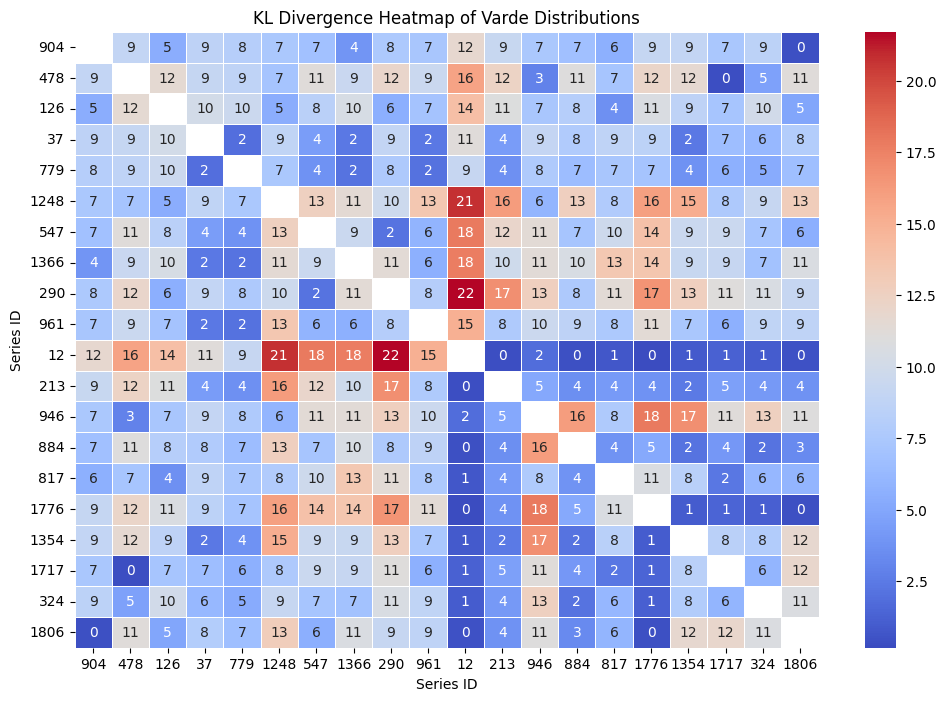

In [149]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Series_id is treated as a string
df['Series_id'] = df['Series_id'].astype(str)

# Select 20 random unique Series IDs
random_series_ids = np.random.choice(df['Series_id'].unique(), size=20, replace=False)

# Filter the dataframe to only include selected Series IDs
df_subset = df[df['Series_id'].isin(random_series_ids)]

# Define a function to estimate probability distributions
def estimate_distribution(series_values, bins=20):
    """Estimate a probability distribution from a given series using histogram bins."""
    hist, bin_edges = np.histogram(series_values, bins=bins, density=True)
    hist += 1e-10  # Avoid zero probabilities
    return hist / hist.sum()  # Normalize to sum to 1

# Compute KL divergence and store in a matrix
kl_matrix = pd.DataFrame(index=random_series_ids, columns=random_series_ids)

for id1, id2 in itertools.combinations(random_series_ids, 2):
    p = estimate_distribution(df_subset[df_subset["Series_id"] == id1]["varde"])
    q = estimate_distribution(df_subset[df_subset["Series_id"] == id2]["varde"])

    kl_div = stats.entropy(p, q)  # KL Divergence
    kl_matrix.loc[id1, id2] = kl_div
    kl_matrix.loc[id2, id1] = kl_div  # Make it symmetric for visualization

# Convert to float type
kl_matrix = kl_matrix.astype(float)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(kl_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".0f")
plt.title("KL Divergence Heatmap of Varde Distributions")
plt.xlabel("Series ID")
plt.ylabel("Series ID")
plt.show()


In [66]:
np.fill_diagonal(kl_matrix.values, 0)
kl_matrix

,540,749,1295,434,562,646,1429,444,763,414,616,948,874,1259,736,683,583,915,1794,1689
540,0.000000,3.386840,1.560907,3.495740,3.959331,2.687505,3.423409,3.560555,2.711084,3.639981,2.231156,2.186695,1.814430,3.148317,3.655725,3.900932,3.834428,3.974734,3.589140,1.977515
749,3.386840,0.000000,1.213931,2.066957,6.589047,2.679814,1.878014,8.020935,2.720723,8.081587,7.609603,0.331744,7.397578,3.017329,8.359368,8.238079,2.244516,0.435785,7.814143,2.179028
1295,1.560907,1.213931,0.000000,14.886492,15.073750,8.825067,14.215181,17.908171,11.057180,17.925500,14.199623,7.330687,14.352218,9.135467,18.804079,17.868354,14.532480,9.067206,15.282513,11.262043
434,3.495740,2.066957,14.886492,0.000000,6.373507,2.478289,3.553006,3.806486,2.619072,3.821454,3.952549,3.926942,5.408282,4.814385,6.026809,3.983813,2.106004,4.045426,3.828496,3.869346
562,3.959331,6.589047,15.073750,6.373507,0.000000,4.799730,4.064230,4.291976,4.980334,4.368224,4.426408,0.487041,2.133454,5.400665,4.431746,4.587365,4.445529,2.556677,4.282540,4.361122
646,2.687505,2.679814,8.825067,2.478289,4.799730,0.000000,10.632249,8.464965,4.964716,13.561755,4.619785,9.404395,10.740374,6.479936,14.203494,8.088874,9.210289,9.448155,8.276662,11.211080
1429,3.423409,1.878014,14.215181,3.553006,4.064230,10.632249,0.000000,7.279914,0.759292,7.343454,3.598026,3.685973,3.482937,4.549281,7.579491,7.526072,3.735775,3.808504,3.558065,0.245003
444,3.560555,8.020935,17.908171,3.806486,4.291976,8.464965,7.279914,0.000000,1.204346,2.278503,0.747567,2.648438,2.240279,3.682817,2.209849,0.251591,2.623536,2.788778,0.242246,2.438798
763,2.711084,2.720723,11.057180,2.619072,4.980334,4.964716,0.759292,1.204346,0.000000,15.877766,7.015097,7.330687,8.980074,9.461242,16.636185,13.778753,10.897637,12.778499,5.714612,5.615951
414,3.639981,8.081587,17.925500,3.821454,4.368224,13.561755,7.343454,2.278503,15.877766,0.000000,4.226563,4.263970,3.857665,5.214426,4.132930,4.337415,0.575673,4.382454,4.028790,4.123075


In [192]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

import pandas as pd
import numpy as np
import scipy.stats as stats
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Series_id is treated as a string
df['Series_id'] = df['Series_id'].astype(str)

# Select 20 random unique Series IDs
size = 50
random_series_ids = np.random.choice(df['Series_id'].unique(), size=size, replace=False)

# Filter the dataframe to only include selected Series IDs
df_subset = df[df['Series_id'].isin(random_series_ids)]

# Define a function to estimate probability distributions
def estimate_distribution(series_values, bins=20):
    """Estimate a probability distribution from a given series using histogram bins."""
    hist, bin_edges = np.histogram(series_values, bins=bins, density=True)
    hist += 1e-10  # Avoid zero probabilities
    return hist / hist.sum()  # Normalize to sum to 1

# Compute KL divergence and store in a matrix
kl_matrix = pd.DataFrame(index=random_series_ids, columns=random_series_ids)

for id1, id2 in itertools.combinations(random_series_ids, 2):
    p = estimate_distribution(df_subset[df_subset["Series_id"] == id1]["varde"], bins=size)
    q = estimate_distribution(df_subset[df_subset["Series_id"] == id2]["varde"], bins=size)

    kl_div = stats.entropy(p, q)  # KL Divergence
    kl_matrix.loc[id1, id2] = kl_div
    kl_matrix.loc[id2, id1] = kl_div  # Make it symmetric for visualization

# Convert to float type
kl_matrix = kl_matrix.astype(float)

np.fill_diagonal(kl_matrix.values, 0)

# Step 1: Find min & max KL divergence
min_kl, max_kl = kl_matrix.min().min(), kl_matrix.max().max()

# Step 2: Define 4 equal bins
bins = np.linspace(min_kl, max_kl, num=5)  # 4 groups = 5 edges

# Step 3: Assign each Series_id to a group
groups = {i: [] for i in range(4)}

for id1 in kl_matrix.index:
    mean_kl = kl_matrix.loc[id1].mean()  # Avg KL divergence with others
    group_idx = np.digitize(mean_kl, bins) - 1  # Assign to bin
    groups[group_idx].append(id1)

import random

# Ensure all groups have data
valid_groups = [g for g in groups if len(groups[g]) > 0]

# Train and evaluate models for all groups
results = {}

for group in valid_groups:
    df_ck = df_subset[df_subset["Series_id"].isin(groups[group])]

    # Randomly sample an equal-sized dataset
    df_rd = df_subset.sample(n=df_ck.shape[0], random_state=42)

    # Drop unwanted columns
    drop_cols = ['ekologisk', 'groda', 'skadegorare', 'graderingsdatum', 'geometry']
    df_ck = df_ck.drop(columns=drop_cols, errors='ignore')
    df_rd = df_rd.drop(columns=drop_cols, errors='ignore')

    # Prepare training sets
    X_ck, y_ck = df_ck.drop(columns=['varde']), df_ck["varde"]
    X_rd, y_rd = df_rd.drop(columns=['varde']), df_rd["varde"]

    # Train Random Forest with 5-fold CV
    rf = RandomForestRegressor(n_estimators=100, random_state=42)

    # Cross-validation
    scores_ck = cross_val_score(rf, X_ck, y_ck, cv=5, scoring='r2')
    scores_rd = cross_val_score(rf, X_rd, y_rd, cv=5, scoring='r2')

    # Store results
    results[group] = {
        "Grouped Data R²": (np.mean(scores_ck), np.std(scores_ck)),
        "Random Sample R²": (np.mean(scores_rd), np.std(scores_rd))
    }

for group in valid_groups:
    # Print results
    print(f"Results for Group {group}:")
    print(f"Grouped Data R²: mean={results[group]['Grouped Data R²'][0]:.4f}, std={results[group]['Grouped Data R²'][1]:.4f}")
    print(f"Random Sample R²: mean={results[group]['Random Sample R²'][0]:.4f}, std={results[group]['Random Sample R²'][1]:.4f}")

Results for Group 0:
Grouped Data R²: mean=-1.3085, std=2.1694
Random Sample R²: mean=0.0095, std=0.3599
Results for Group 1:
Grouped Data R²: mean=-0.1782, std=0.2984
Random Sample R²: mean=0.0908, std=0.1037
Results for Group 2:
Grouped Data R²: mean=-0.0623, std=0.0763
Random Sample R²: mean=-2.0660, std=4.4383


In [191]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np

# Prepare data (drop non-numeric columns)
X = df.drop(columns=["varde", "Series_id", 'ekologisk', 'groda', 'skadegorare', 'graderingsdatum', 'geometry'])  # Drop target & non-numeric
y = df["varde"]

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate model
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

# Cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Print results
print(f"Train R²: {train_score:.4f}")
print(f"Test R²: {test_score:.4f}")
print(f"Cross-Validation R²: mean={np.mean(cv_scores):.4f}, std={np.std(cv_scores):.4f}")


Train R²: 0.0418
Test R²: 0.0158
Cross-Validation R²: mean=-0.0930, std=0.1037


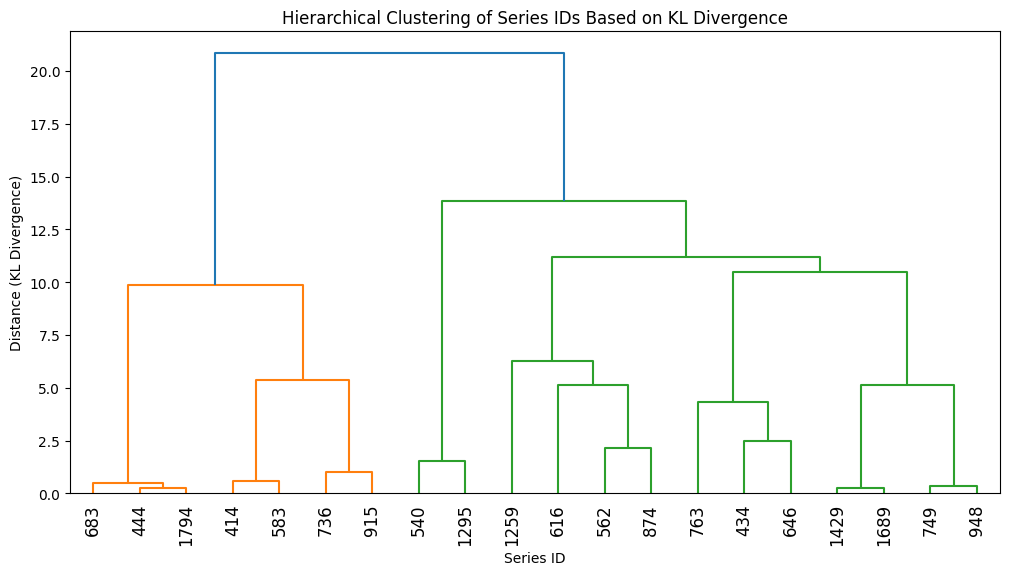

In [67]:
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import squareform

# Convert to condensed distance matrix
kl_condensed = squareform(kl_matrix)

# Perform hierarchical clustering
linkage_matrix = sch.linkage(kl_condensed, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix, labels=kl_matrix.index, leaf_rotation=90)
plt.title("Hierarchical Clustering of Series IDs Based on KL Divergence")
plt.xlabel("Series ID")
plt.ylabel("Distance (KL Divergence)")
plt.show()


In [68]:
from scipy.cluster.hierarchy import fcluster

# Define the cut-off distance
cutoff_distance = 6

# Generate cluster labels based on the cut
clusters = fcluster(linkage_matrix, t=cutoff_distance, criterion='distance')

# Create a DataFrame to view which Series ID belongs to which cluster
cluster_df = pd.DataFrame({'Series ID': kl_matrix.index, 'Cluster': clusters})

# Display the clusters
print(cluster_df.sort_values(by='Cluster'))


   Series ID  Cluster
15       683        1
18      1794        1
7        444        1
9        414        2
17       915        2
16       583        2
14       736        2
0        540        3
2       1295        3
10       616        4
12       874        4
4        562        4
13      1259        5
8        763        6
5        646        6
3        434        6
11       948        7
1        749        7
6       1429        7
19      1689        7


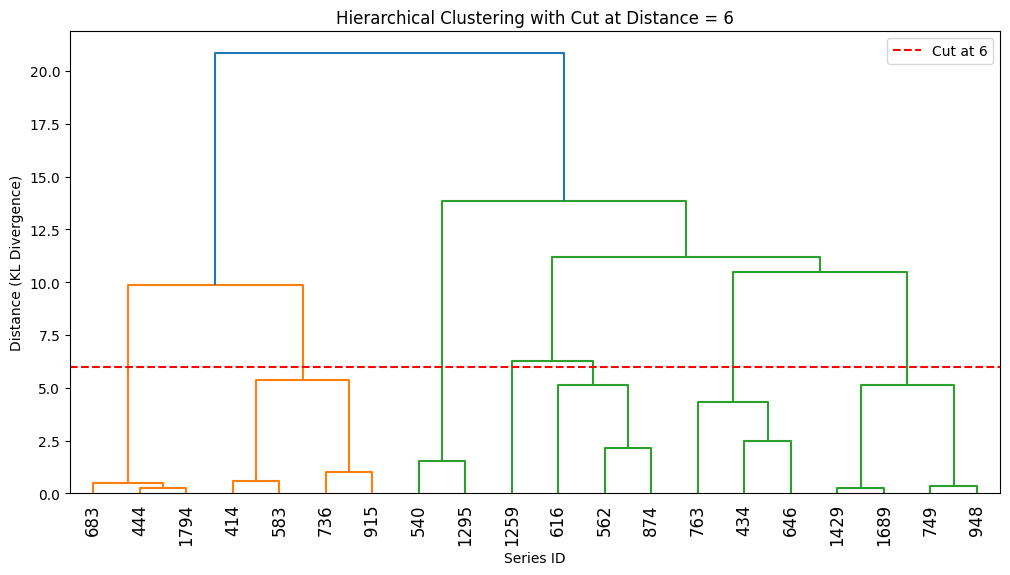

In [69]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix, labels=kl_matrix.index, leaf_rotation=90)
plt.axhline(y=cutoff_distance, color='r', linestyle='--', label="Cut at 6")  # Add cut-off line
plt.title("Hierarchical Clustering with Cut at Distance = 6")
plt.xlabel("Series ID")
plt.ylabel("Distance (KL Divergence)")
plt.legend()
plt.show()


In [70]:
print(f"Number of clusters at distance {cutoff_distance}: {len(set(clusters))}")

Number of clusters at distance 6: 7


C:\Users\Mahmu\AppData\Local\Temp\ipykernel_20140\1023652634.py:6: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



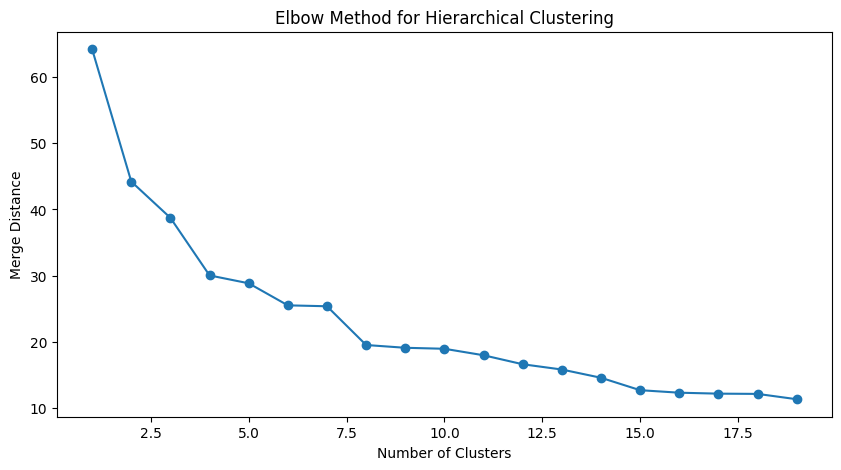

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Compute linkage matrix (if not already done)
linkage_matrix = sch.linkage(kl_matrix.values, method='ward')

# Compute the distances at which clusters are formed
distances = linkage_matrix[:, 2]

# Create an "elbow plot"
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(distances) + 1), distances[::-1], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Merge Distance")
plt.title("Elbow Method for Hierarchical Clustering")
plt.show()


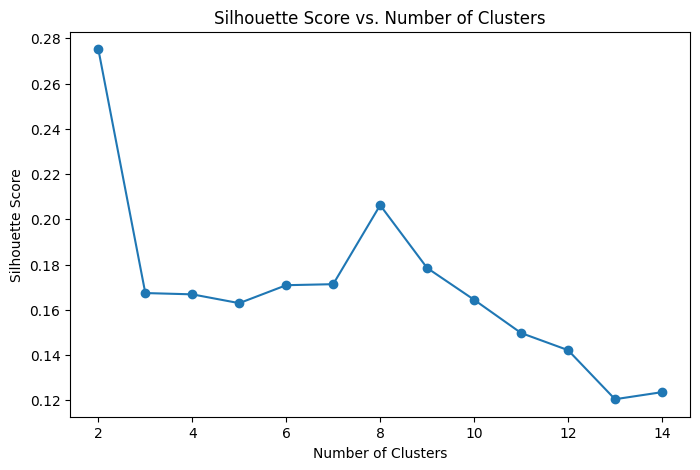

Optimal number of clusters: 2


In [72]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

best_score = -1
best_k = None
scores = []

# Try different cluster counts
for k in range(2, 15):  # Adjust range based on dataset size
    labels = fcluster(linkage_matrix, k, criterion='maxclust')
    score = silhouette_score(kl_matrix.values, labels, metric='euclidean')
    scores.append(score)
    
    if score > best_score:
        best_score = score
        best_k = k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 15), scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

print(f"Optimal number of clusters: {best_k}")


In [73]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform

# Ensure Series_id is treated as a string
df['Series_id'] = df['Series_id'].astype(str)

# Select 100 random unique Series IDs
# choose field sample size with: https://www.calculator.net/sample-size-calculator.html?type=1&cl=95&ci=5&pp=50&ps=1000&x=Calculate
random_series_ids = np.random.choice(df['Series_id'].unique(), size=278, replace=False)

# Filter the dataframe to only include selected Series IDs
df_subset = df[df['Series_id'].isin(random_series_ids)]

# Function to estimate probability distributions
def estimate_distribution(series_values, bins=10):  # Reduce bins for speed
    hist, _ = np.histogram(series_values, bins=bins, density=True)
    hist += 1e-10  # Avoid zero probabilities
    return hist / hist.sum()  # Normalize

# Compute KL divergence matrix
kl_matrix = pd.DataFrame(index=random_series_ids, columns=random_series_ids, dtype=float)

for id1, id2 in itertools.combinations(random_series_ids, 2):
    p = estimate_distribution(df_subset[df_subset["Series_id"] == id1]["varde"])
    q = estimate_distribution(df_subset[df_subset["Series_id"] == id2]["varde"])
    
    kl_div = stats.entropy(p, q)  # KL Divergence
    kl_matrix.loc[id1, id2] = kl_div
    kl_matrix.loc[id2, id1] = kl_div  # Symmetric matrix

# Fill diagonal with 0 (self-divergence)
np.fill_diagonal(kl_matrix.values, 0)

# Convert to condensed distance matrix for clustering
condensed_distances = squareform(kl_matrix, checks=False)

# Perform hierarchical clustering
linkage_matrix = sch.linkage(condensed_distances, method='ward')

# Determine optimal clusters using Elbow Method
distances = linkage_matrix[:, 2]  # Extract distances from clustering
num_clusters = range(1, len(distances) + 1)

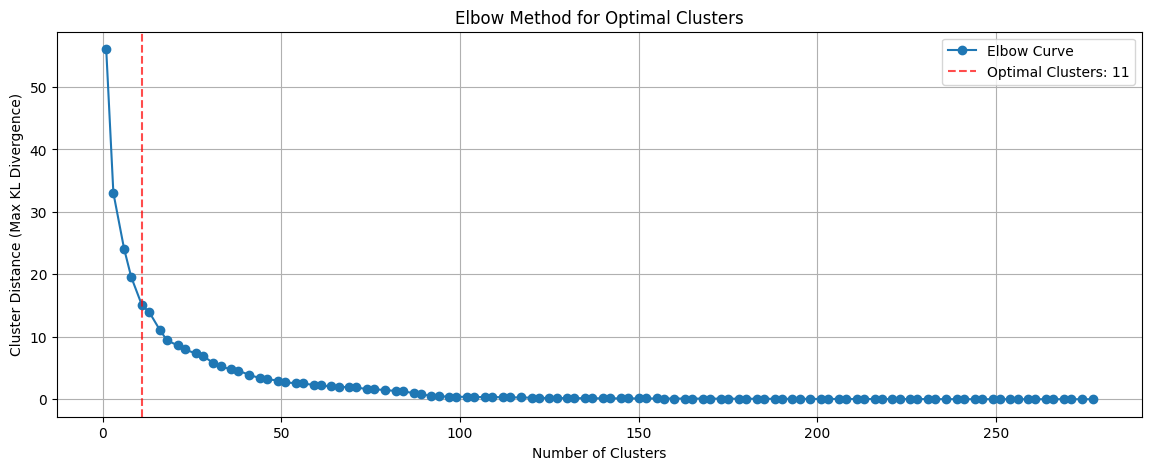

In [74]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 5))  # Make the plot wider

# Select 10% of points for plotting
perc = 0.4
num_samples = max(2, int(perc * len(distances)))  # Ensure at least 2 points
indices = np.linspace(0, len(distances) - 1, num_samples, dtype=int)  # Evenly spaced indices

x_values = np.array(range(1, len(distances) + 1))[indices]  # X-axis (cluster count)
y_values = distances[::-1][indices]  # Y-axis (cluster distances)

plt.plot(x_values, y_values, marker='o', linestyle='-', label="Elbow Curve")

# **Mark the second plotted point with a legend**
if len(x_values) > 1:
    second_x = x_values[4]
    plt.axvline(x=second_x, color='red', linestyle='--', alpha=0.7, label=f'Optimal Clusters: {second_x}')

plt.xlabel("Number of Clusters")
plt.ylabel("Cluster Distance (Max KL Divergence)")
plt.title("Elbow Method for Optimal Clusters")
plt.grid()
plt.legend()  # Add legend here
plt.show()


In [75]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the KL divergence values using Min-Max Scaling (0-1 range)
scaler = MinMaxScaler()
kl_matrix_norm = scaler.fit_transform(kl_matrix)

normalized_df = pd.DataFrame(kl_matrix_norm, index=random_series_ids, columns=random_series_ids)
normalized_df


,1418,682,395,1254,43,477,1428,1026,623,1286,...,193,40,1008,1282,228,1646,767,1635,1117,1747
1418,0.000000,0.401277,0.248895,0.244238,0.256383,0.477604,0.419179,0.671953,0.308368,0.271533,...,0.457267,0.369960,0.273556,0.843113,0.460992,0.544293,0.275881,0.192036,0.543391,0.548359
682,0.402696,0.000000,0.212230,0.281167,0.216783,0.085414,0.147407,0.391993,0.289763,0.154066,...,0.076299,0.158452,0.164847,0.152758,0.077725,0.233428,0.234784,0.238202,0.231650,0.315579
395,0.254140,0.215939,0.000000,0.092916,0.001169,0.116111,0.099186,0.240727,0.149191,0.100940,...,0.103894,0.104270,0.008655,0.204695,0.103357,0.096066,0.001368,0.103228,0.197146,0.194123
1254,0.245730,0.281888,0.091554,0.000000,0.165722,0.192676,0.172762,0.324404,0.120049,0.262703,...,0.269148,0.270754,0.183705,0.345147,0.272672,0.261369,0.173379,0.091856,0.262472,0.265249
43,0.260859,0.219790,0.001165,0.167591,0.000000,0.106090,0.086073,0.329708,0.233865,0.092663,...,0.095606,0.095834,0.009279,0.182157,0.092685,0.088858,0.003345,0.184183,0.268665,0.266923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,0.508052,0.217119,0.087819,0.242484,0.081518,0.307110,0.142978,0.003839,0.695415,0.158554,...,0.183265,0.173725,0.294760,0.473515,0.147502,0.000000,0.005497,0.091150,0.084379,0.080290
767,0.239978,0.203510,0.001165,0.149900,0.002860,0.286072,0.134140,0.009270,0.408581,0.149987,...,0.173364,0.164338,0.091745,0.440601,0.139943,0.005123,0.000000,0.095400,0.177089,0.176939
1635,0.172316,0.212988,0.090715,0.081923,0.162433,0.199186,0.273660,0.013725,0.267926,0.157616,...,0.182181,0.258981,0.193600,0.462540,0.220062,0.087624,0.098410,0.000000,0.237996,0.235932
1117,0.485103,0.206073,0.172366,0.232895,0.235731,0.290768,0.400402,0.007343,0.414328,0.231335,...,0.173983,0.253470,0.376343,0.601572,0.287723,0.080701,0.181746,0.236782,0.000000,0.149777


In [101]:
# Specify the desired number of clusters
num_clusters = 4

# Generate cluster labels based on the desired number of clusters
clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Create a DataFrame to view which Series ID belongs to which cluster
cluster_df = pd.DataFrame({'Series_id': kl_matrix.index, 'Cluster': clusters})

# Display the clusters
print(cluster_df.sort_values(by='Cluster'))


    Series_id  Cluster
17        384        1
229      1804        1
117      1505        1
37        589        1
163      1154        2
..        ...      ...
169       832        4
170      1494        4
171      1863        4
162      1667        4
138      1880        4

[278 rows x 2 columns]


In [102]:
# Drop 'Cluster_id' if it already exists to prevent duplicates
if 'Cluster_id' in df_subset.columns:
    df_subset = df_subset.drop(columns=['Cluster_id'])

# Merge df_subset with cluster_df on 'Series_id' to assign 'Cluster_id'
df_subset = df_subset.merge(cluster_df, on='Series_id', how='left')

# Rename the column for clarity
df_subset.rename(columns={'Cluster': 'Cluster_id'}, inplace=True)

# Display the updated dataframe
df_subset.head()


,ekologisk,groda,skadegorare,graderingsdatum,utvecklingsstadium,varde,Series_id,week,geometry,latitude,longitude,Cluster_id
0,False,Höstvete,Svartpricksjuka,2016-04-18,25.0,2.0,1,16,POINT (15.70890618306292 56.1859338796056),56.185934,15.708906,3
1,False,Höstvete,Svartpricksjuka,2016-04-25,25.0,22.0,1,17,POINT (15.70890618306292 56.1859338796056),56.185934,15.708906,3
2,False,Höstvete,Svartpricksjuka,2016-05-02,25.0,24.0,1,18,POINT (15.70890618306292 56.1859338796056),56.185934,15.708906,3
3,False,Höstvete,Svartpricksjuka,2016-05-09,31.0,12.0,1,19,POINT (15.70890618306292 56.1859338796056),56.185934,15.708906,3
4,False,Höstvete,Svartpricksjuka,2016-05-16,32.0,8.0,1,20,POINT (15.70890618306292 56.1859338796056),56.185934,15.708906,3


In [103]:
vals1 = np.unique(df_subset['Series_id'])
print(vals1.shape)

vals2 = np.unique(df_subset['Cluster_id'])
print(vals2.shape)

(278,)
(4,)


In [104]:
print(np.unique(df_subset['Cluster_id'], return_counts=True))

(array([1, 2, 3, 4], dtype=int32), array([  42,  647,  751, 1603], dtype=int64))


In [134]:
df_ck = df_subset[df_subset['Cluster_id'] == np.random.randint(0, num_clusters)]
df_rd = df_subset.sample(n=df_ck.shape[0])

In [135]:
df_ck = df_ck.drop(['ekologisk', 'groda', 'skadegorare', 'graderingsdatum', 'geometry', 'latitude', 'longitude', 'Cluster_id'], axis=1)
df_rd = df_rd.drop(['ekologisk', 'groda', 'skadegorare', 'graderingsdatum', 'geometry', 'latitude', 'longitude', 'Cluster_id'], axis=1)

In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import numpy as np

# Split into features and target (assuming last column is the target)
X_ck, y_ck = df_ck.iloc[:, :-1], df_ck.iloc[:, -1]
X_rd, y_rd = df_rd.iloc[:, :-1], df_rd.iloc[:, -1]

# Initialize the model
rf = RandomForestRegressor(n_estimators=100)

# Perform 5-fold cross-validation
scores_ck = cross_val_score(rf, X_ck, y_ck, cv=5, scoring='r2')
scores_rd = cross_val_score(rf, X_rd, y_rd, cv=5, scoring='r2')

# Compute mean and std
mean_ck, std_ck = np.mean(scores_ck), np.std(scores_ck)
mean_rd, std_rd = np.mean(scores_rd), np.std(scores_rd)

print(f"R² for Cluster: mean={mean_ck:.4f}, std={std_ck:.4f}")
print(f"R² for Random: mean={mean_rd:.4f}, std={std_rd:.4f}")


R² for Cluster: mean=0.8920, std=0.0307
R² for Random: mean=0.9278, std=0.0050


In [144]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Compute distribution statistics per "Series_id"
series_stats = df.groupby("Series_id")["varde"].agg(
    mean="mean", std="std", skew=skew, kurt=kurtosis
).fillna(0)  # Handle NaN values if std=0

# Standardize features
scaler = StandardScaler()
stats_scaled = scaler.fit_transform(series_stats)

# Cluster series based on target distribution
n_clusters = 5  # Adjust based on Elbow Method or Silhouette Score
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
series_stats["Cluster_id"] = kmeans.fit_predict(stats_scaled)

# Merge cluster assignments back to the main df
df = df.merge(series_stats["Cluster_id"], on="Series_id", how="left")

print(df.head())  # Now df has a "Cluster_id" column


C:\Users\Mahmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\groupby\generic.py:324: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



   ekologisk     groda      skadegorare graderingsdatum  utvecklingsstadium  \
0      False  Höstvete  Svartpricksjuka      2016-04-18                24.0   
1      False  Höstvete  Svartpricksjuka      2016-04-25                30.0   
2      False  Höstvete  Svartpricksjuka      2016-05-02                30.0   
3      False  Höstvete  Svartpricksjuka      2016-05-09                31.0   
4      False  Höstvete  Svartpricksjuka      2016-05-16                32.0   

   varde Series_id  week                                      geometry  \
0   33.0         0    16  POINT (14.662356797839683 56.10664183335871)   
1    6.0         0    17  POINT (14.662356797839683 56.10664183335871)   
2    4.0         0    18  POINT (14.662356797839683 56.10664183335871)   
3    3.0         0    19  POINT (14.662356797839683 56.10664183335871)   
4    3.0         0    20  POINT (14.662356797839683 56.10664183335871)   

    latitude  longitude  Cluster_id  
0  56.106642  14.662357           3  
1  5

In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the two datasets
df_ck = df[df['Cluster_id'] == np.random.randint(0, num_clusters)]
df_rd = df.sample(n=df_ck.shape[0])

df_ck = df_ck.drop(['ekologisk', 'groda', 'skadegorare', 'graderingsdatum', 'geometry', 'latitude', 'longitude', 'Cluster_id'], axis=1)
df_rd = df_rd.drop(['ekologisk', 'groda', 'skadegorare', 'graderingsdatum', 'geometry', 'latitude', 'longitude', 'Cluster_id'], axis=1)

# Split into features and target (assuming last column is the target)
X_ck, y_ck = df_ck.iloc[:, :-1], df_ck.iloc[:, -1]
X_rd, y_rd = df_rd.iloc[:, :-1], df_rd.iloc[:, -1]

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
scores_ck = cross_val_score(rf, X_ck, y_ck, cv=5, scoring='r2')
scores_rd = cross_val_score(rf, X_rd, y_rd, cv=5, scoring='r2')

# Compute mean and std
mean_ck, std_ck = np.mean(scores_ck), np.std(scores_ck)
mean_rd, std_rd = np.mean(scores_rd), np.std(scores_rd)

print(f"R² for df_ck: mean={mean_ck:.4f}, std={std_ck:.4f}")
print(f"R² for df_rd: mean={mean_rd:.4f}, std={std_rd:.4f}")


R² for df_ck: mean=0.8741, std=0.0190
R² for df_rd: mean=0.9436, std=0.0061
